<a href="https://colab.research.google.com/github/AdamKhanBM/AdamKhanBM/blob/main/Colonia_Algoritmo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# Start at the root of your Google Drive
path = '/content/drive/My Drive/Programing/Colony/GVB236/Colonias'

# Function to print directories recursively
def list_directories(path, level=0):
    for item in os.listdir(path):
        if os.path.isdir(os.path.join(path, item)):
            print('  ' * level + f"- {item}/")
            list_directories(os.path.join(path, item), level + 1)
        else:
            print('  ' * level + f"- {item}")

# List directories starting from the root of your Google Drive
list_directories(path)


Mounted at /content/drive
- LD_2_2.png
- LD_2_1.png
- LD_1_2.png
- LD_1_1.png
- HD_2_2.png
- HD_2_1.png
- HD_1_2.png
- HD_1_1.png
- C_2_2.png
- C_2_1.png
- C_1_2.png
- C_1_1.png
- C_1_1_segmentation.png
- C_2_1_segmentation.png
- HD_1_1_segmentation.png
- HD_2_1_segmentation.png
- LD_1_1_segmentation.png
- LD_2_1_segmentation.png
- C_1_2_segmentation.png
- C_2_2_segmentation.png
- HD_1_2_segmentation.png
- HD_2_2_segmentation.png
- LD_1_2_segmentation.png
- raw_colony_counts.csv
- LD_2_2_segmentation.png
- C_1_1_TotalArea.png
- C_2_1_TotalArea.png
- HD_1_1_TotalArea.png
- HD_2_1_TotalArea.png
- LD_1_1_TotalArea.png
- LD_2_1_TotalArea.png
- C_1_2_TotalArea.png
- C_2_2_TotalArea.png
- HD_1_2_TotalArea.png
- HD_2_2_TotalArea.png
- LD_1_2_TotalArea.png
- LD_2_2_TotalArea.png
- raw_area_count.csv
- C_1_1_analysis.png
- C_2_1_analysis.png
- LD_1_1_analysis.png
- LD_2_1_analysis.png
- HD_1_1_analysis.png
- HD_2_1_analysis.png
- C_1_2_analysis.png
- C_2_2_analysis.png
- LD_1_2_analysis.png
- L

Segmentation saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/C_1_1_segmentation.png
Segmentation saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/C_2_1_segmentation.png
Segmentation saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/HD_1_1_segmentation.png
Segmentation saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/HD_2_1_segmentation.png
Segmentation saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/LD_1_1_segmentation.png
Segmentation saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/LD_2_1_segmentation.png
Segmentation saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/C_1_2_segmentation.png
Segmentation saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/C_2_2_segmentation.png
Segmentation saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/HD_1_2_segmentation.png
Segmentation saved to /content/drive/My Drive/Programing/Colony/GVB2

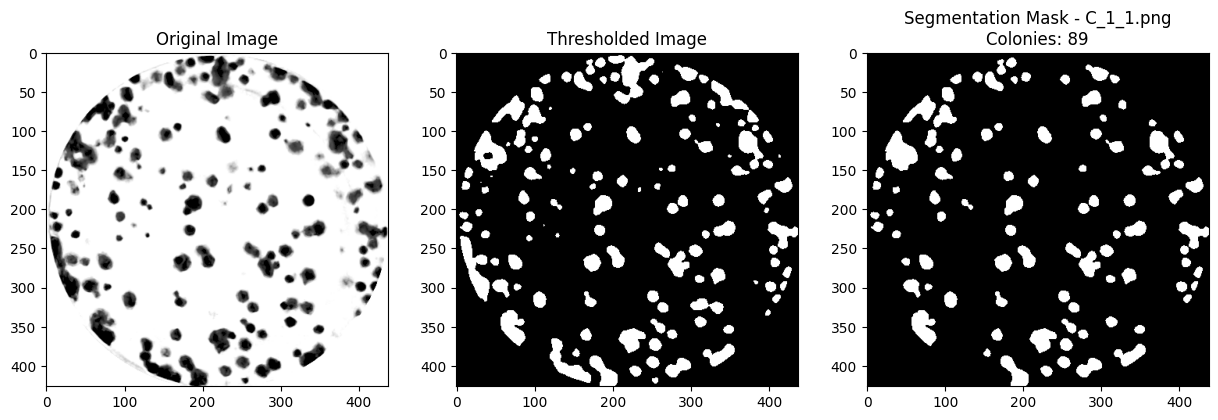

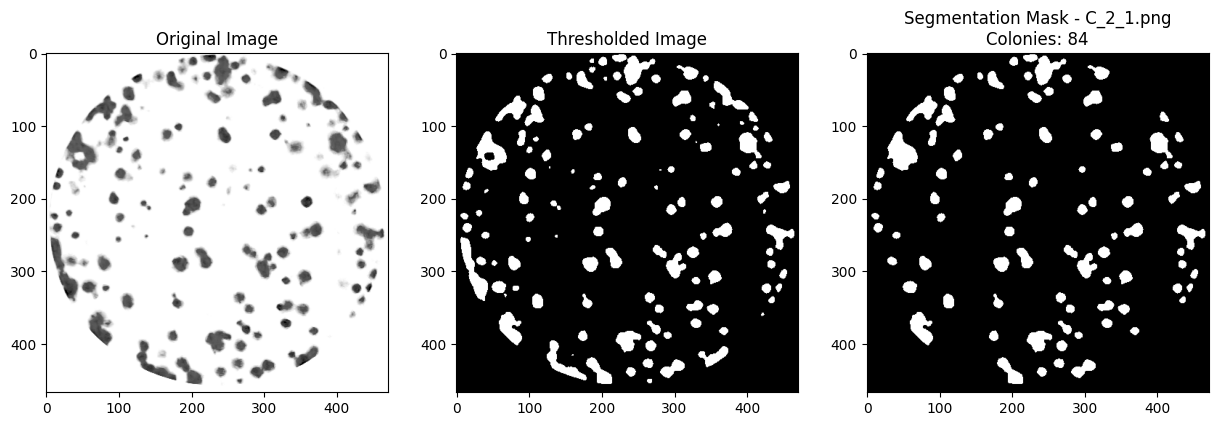

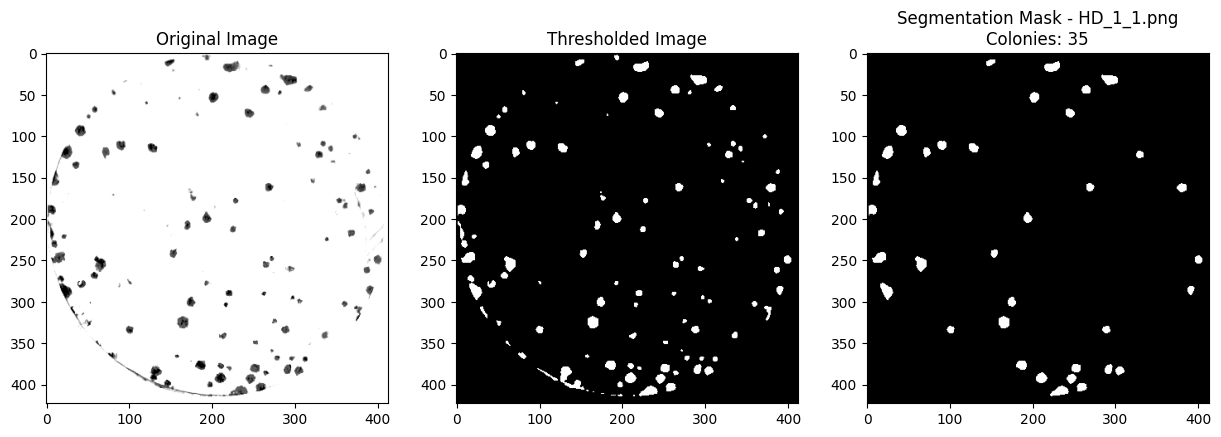

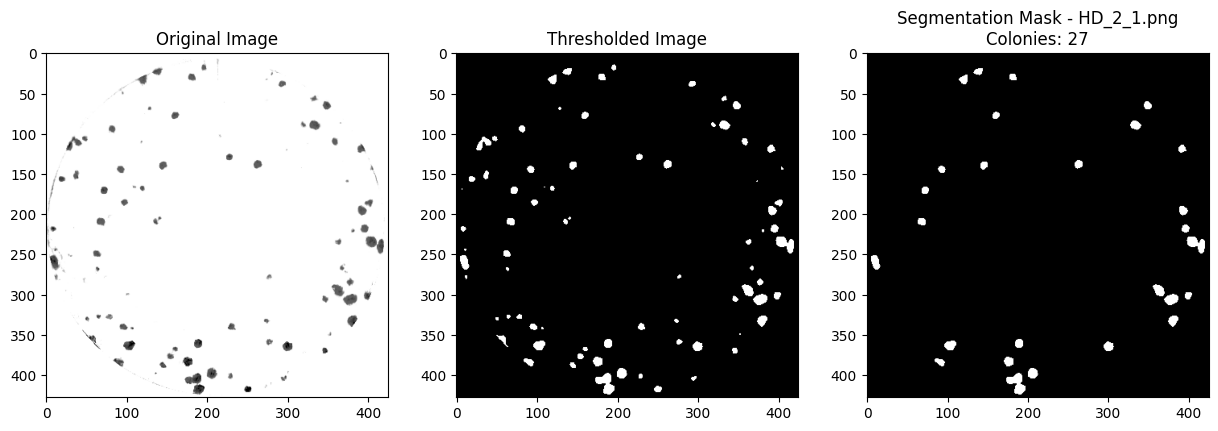

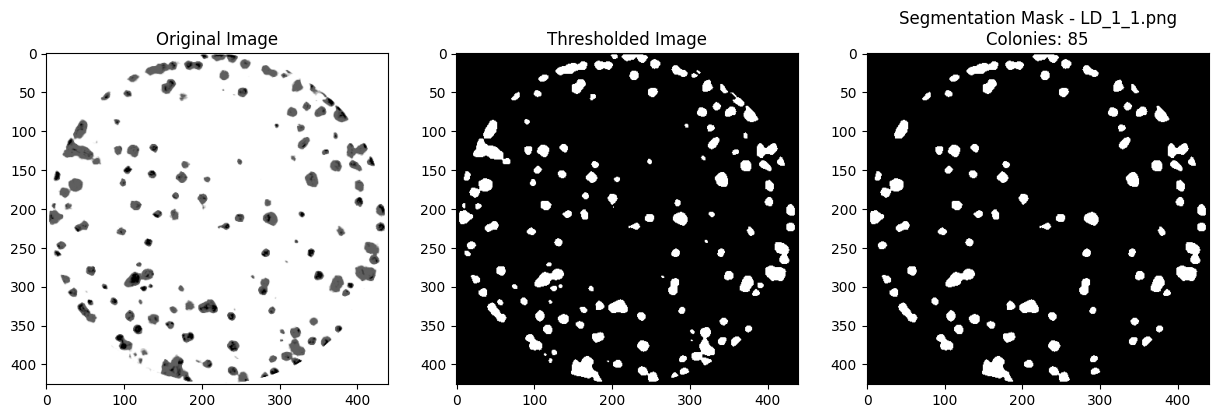

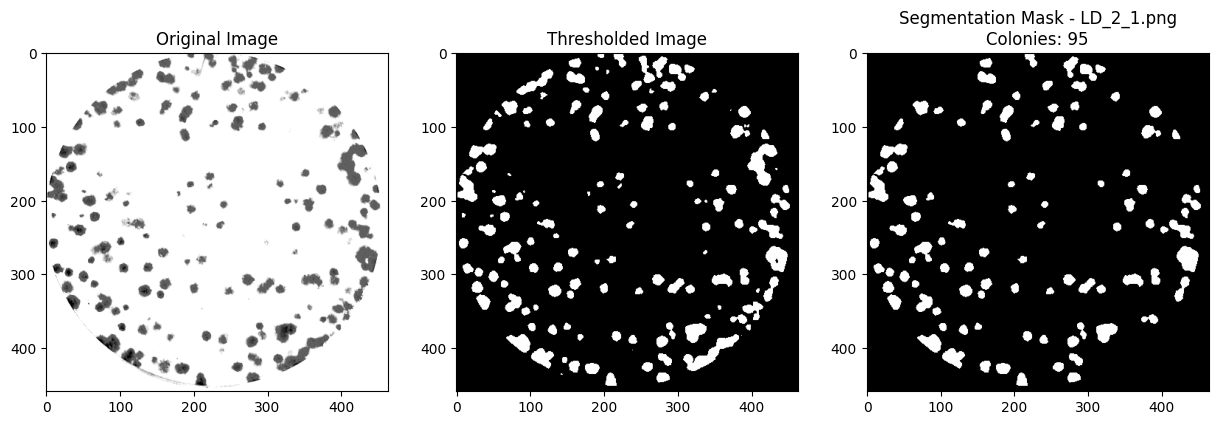

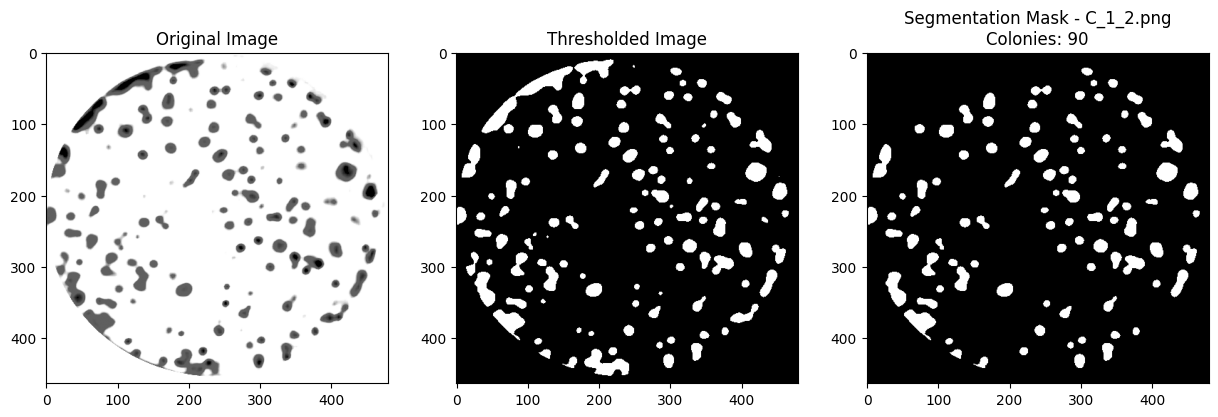

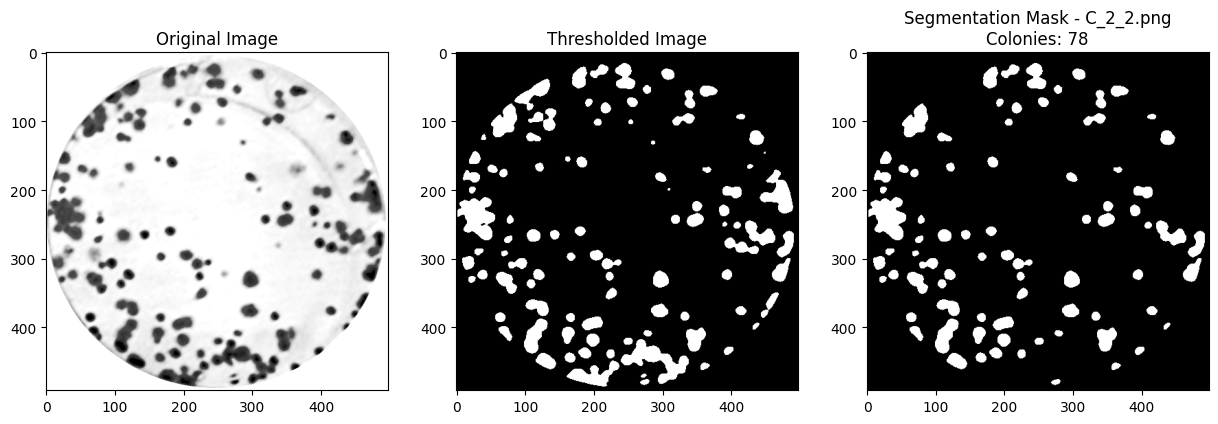

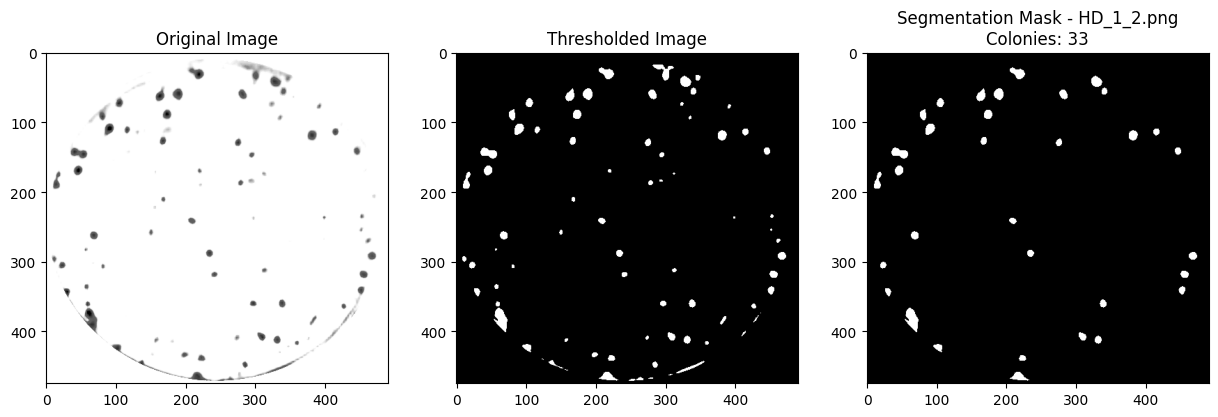

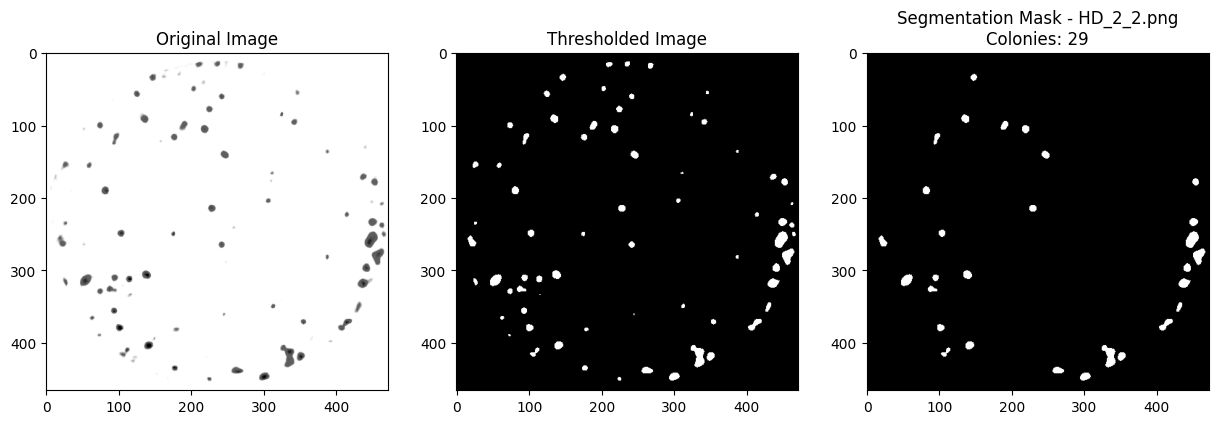

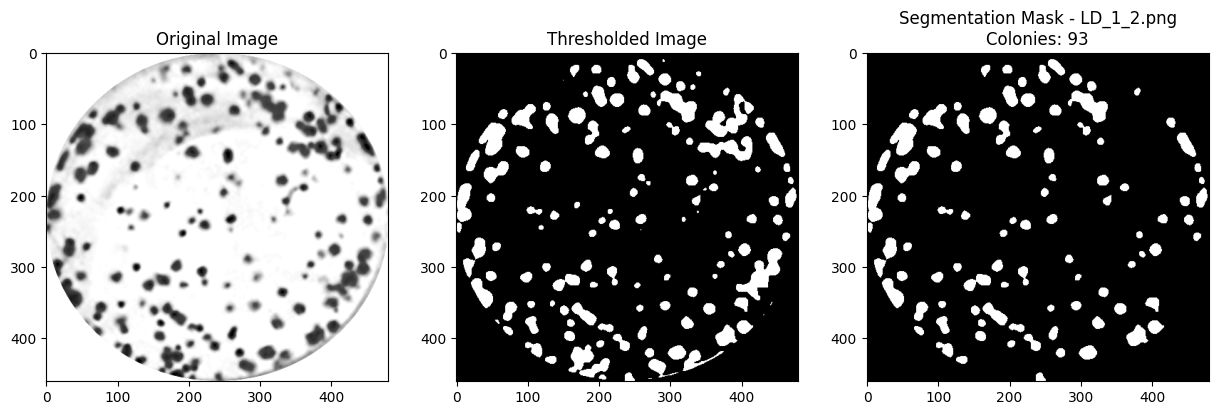

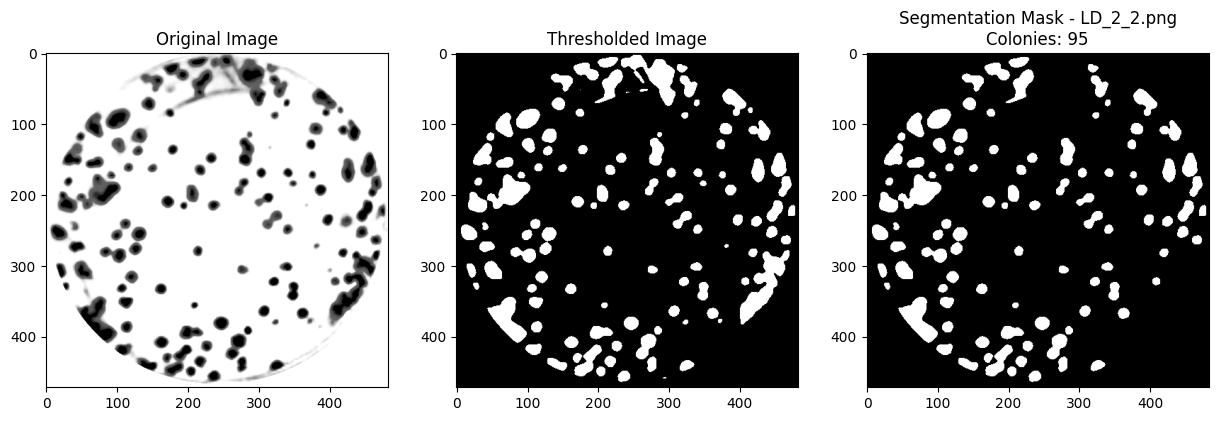

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import csv

# List of image filenames
image_filenames = [
    'C_1_1.png', 'C_2_1.png',
    'HD_1_1.png', 'HD_2_1.png',
    'LD_1_1.png', 'LD_2_1.png',
    'C_1_2.png', 'C_2_2.png',
    'HD_1_2.png', 'HD_2_2.png',
    'LD_1_2.png', 'LD_2_2.png'
]

# Define the base path to the images
base_path = path  # Update this with the actual path

# Initialize a list to store colony counts
colony_counts = []

# Loop through each image file
for filename in image_filenames:
    # Construct the full path to the image
    filepath = os.path.join(base_path, filename)

    # Load the image
    image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Error: Could not read image {filepath}")
        colony_counts.append(0)  # Append 0 if the image could not be read
        continue  # Skip this image

    # Preprocess the image
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Use Otsu's method to find the optimal threshold for the image
    _, otsu_thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Invert the thresholded image so colonies are white on black background
    inverted_thresh = cv2.bitwise_not(otsu_thresh)

    # Find contours (colonies) in the inverted image
    contours, _ = cv2.findContours(inverted_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on circularity
    circular_contours = []
    min_area = 50   # Minimum size of the contour area
    max_area = 5000  # Maximum size of the contour area
    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        if perimeter == 0:
            continue  # Avoid division by zero
        circularity = 4 * np.pi * area / (perimeter ** 2)
        if 0.4 < circularity <= 1.5 and min_area <= area <= max_area:
            circular_contours.append(contour)

    # Count the colonies
    colony_count = len(circular_contours)
    colony_counts.append(colony_count)

    # Create a mask for the segmented colonies
    segmentation_mask = np.zeros_like(image)
    cv2.drawContours(segmentation_mask, circular_contours, -1, 255, thickness=cv2.FILLED)  # Fill contours with white

    # Visualize results
    plt.figure(figsize=(15, 5))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    # Thresholded Image
    plt.subplot(1, 3, 2)
    plt.imshow(inverted_thresh, cmap='gray')
    plt.title('Thresholded Image')

    # Segmentation Mask
    plt.subplot(1, 3, 3)
    plt.imshow(segmentation_mask, cmap='gray')
    plt.title(f'Segmentation Mask - {filename}\nColonies: {colony_count}')

    # Save segmentation plot
    segmentation_plot_filename = os.path.join(base_path, filename.replace('.png', '_segmentation.png'))
    plt.savefig(segmentation_plot_filename)
    print(f"Segmentation saved to {segmentation_plot_filename}")

# Save the colony counts to a CSV file
csv_filename = os.path.join(base_path, 'raw_colony_counts.csv')
with open(csv_filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Filename', 'Colony Count'])
    for filename, count in zip(image_filenames, colony_counts):
        writer.writerow([filename, count])

print(f"All colony counts saved to {csv_filename}.")

Plot saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/C_1_1_TotalArea.png
Plot saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/C_2_1_TotalArea.png
Plot saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/HD_1_1_TotalArea.png
Plot saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/HD_2_1_TotalArea.png
Plot saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/LD_1_1_TotalArea.png
Plot saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/LD_2_1_TotalArea.png
Plot saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/C_1_2_TotalArea.png
Plot saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/C_2_2_TotalArea.png
Plot saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/HD_1_2_TotalArea.png
Plot saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/HD_2_2_TotalArea.png
Plot saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/LD

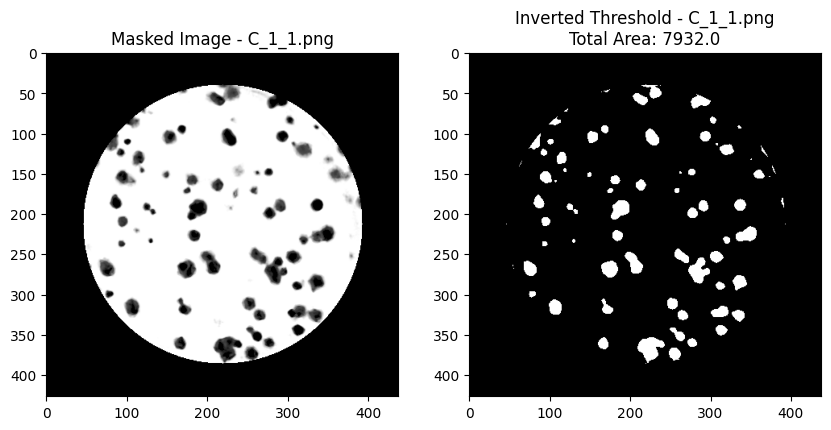

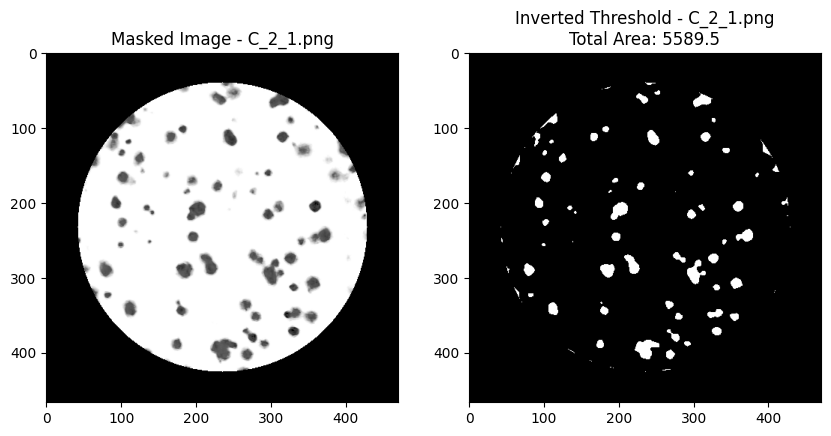

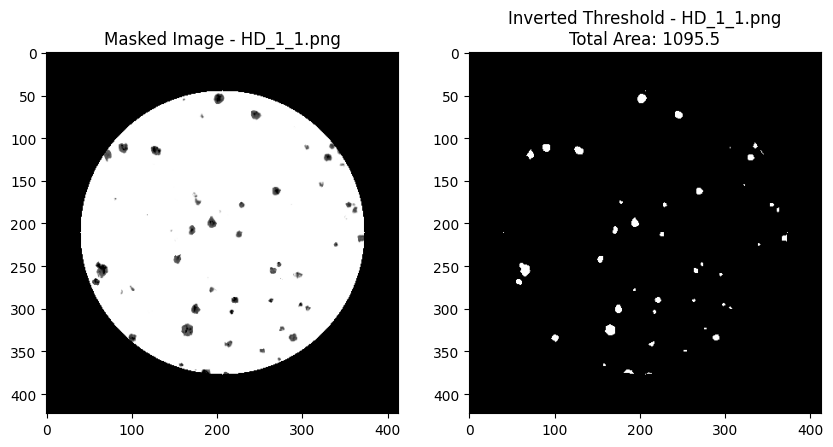

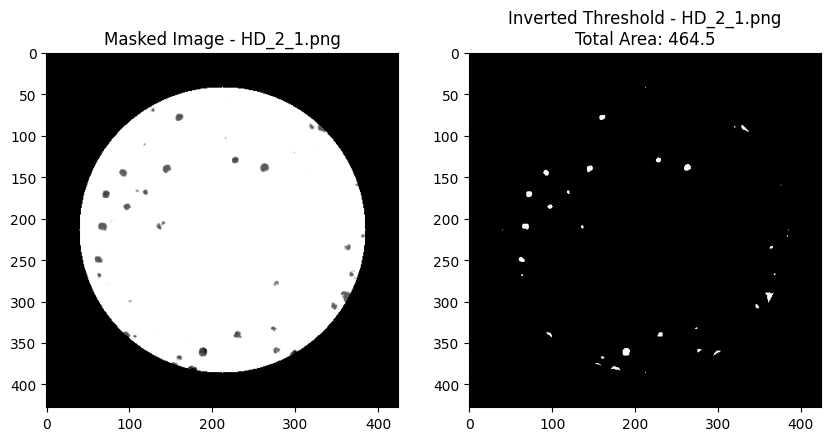

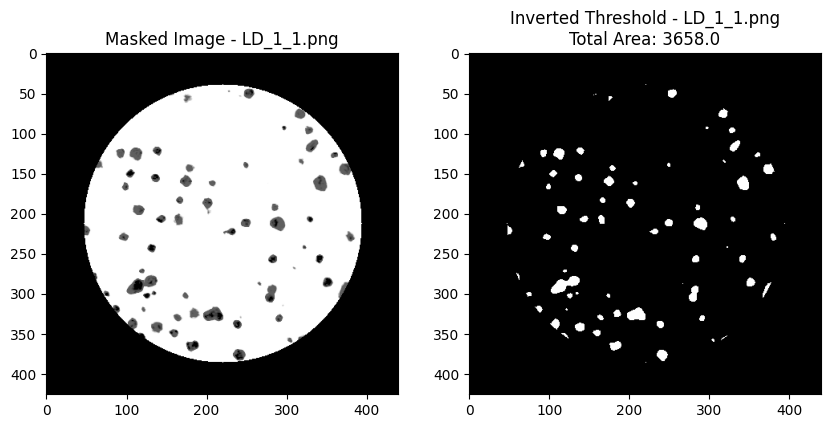

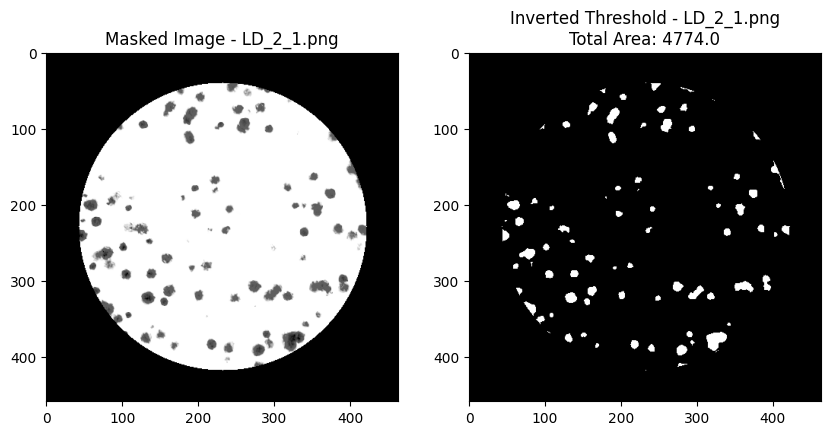

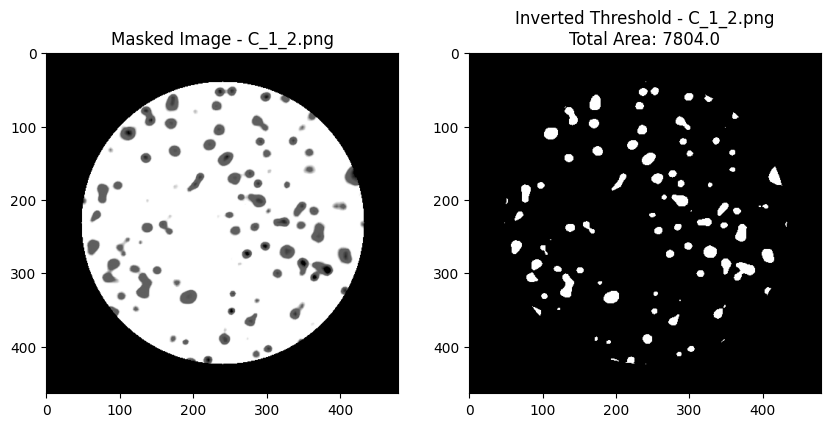

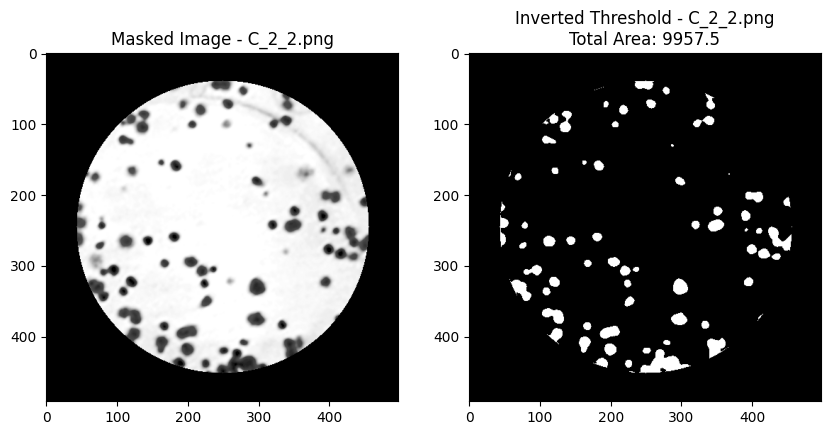

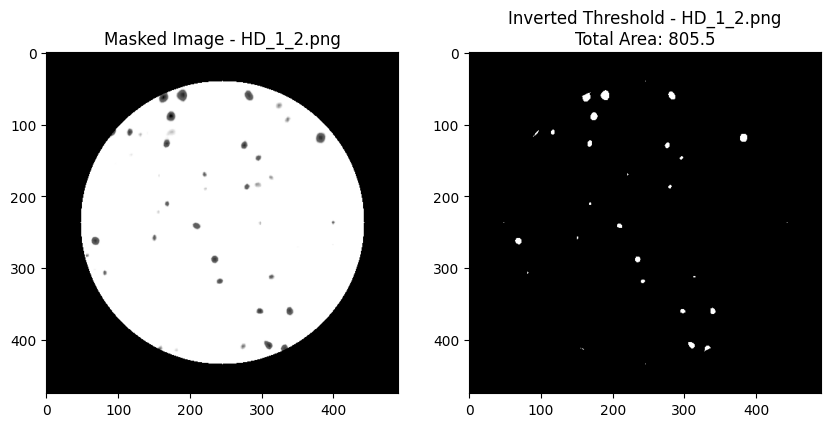

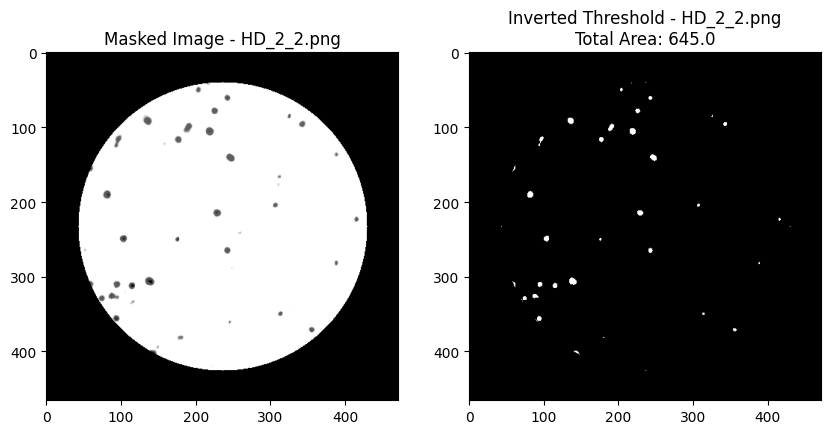

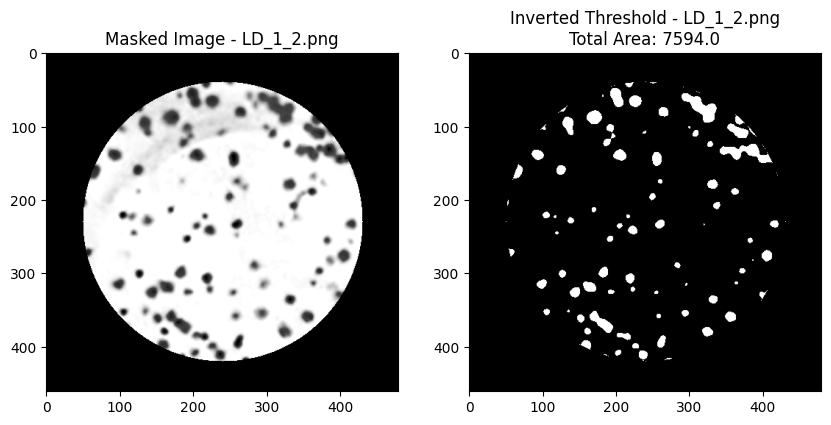

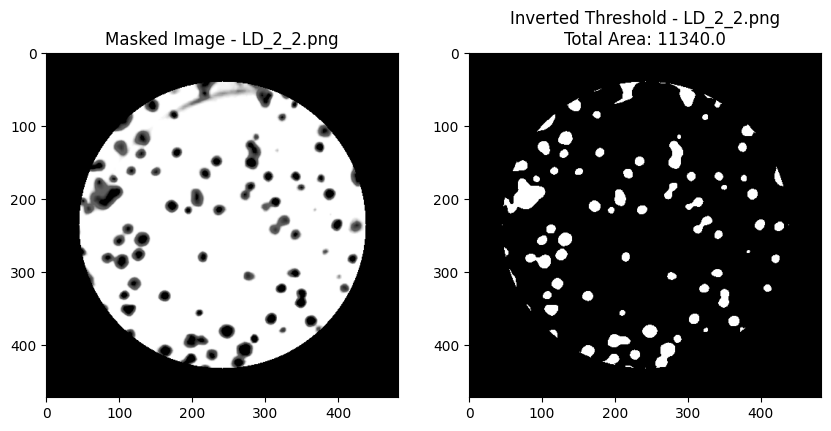

In [ ]:
# Function to apply a circular mask to the image
def apply_circular_mask(image):
    # Assuming image is grayscale
    rows, cols = image.shape
    center = (cols // 2, rows // 2)
    radius = min(center[0], center[1], cols - center[0], rows - center[1]) - 40  # Adjust the radius as needed

    # Create the mask
    mask = np.zeros((rows, cols), dtype=np.uint8)
    cv2.circle(mask, center, radius, 255, -1)

    # Apply the mask
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    return masked_image

# Open a CSV file to write the area counts
csv_filename = os.path.join(base_path, 'raw_area_count.csv')
with open(csv_filename, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Filename', 'Total Area'])

    # Loop over each image
    for filename in image_filenames:
        filepath = os.path.join(base_path, filename)
        image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Error: Could not read image {filepath}")
            continue  # Skip this image if not found

        masked_image = apply_circular_mask(image)
        blurred = cv2.GaussianBlur(masked_image, (5, 5), 0)
        _, otsu_thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        inverted_thresh = cv2.bitwise_not(otsu_thresh)
        inverted_thresh_masked = cv2.bitwise_and(inverted_thresh, inverted_thresh, mask=apply_circular_mask(np.ones_like(image) * 255))
        contours, _ = cv2.findContours(inverted_thresh_masked, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        total_area = sum(cv2.contourArea(contour) for contour in contours)
        csvwriter.writerow([filename, total_area])

        # Visualization and saving plots
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(masked_image, cmap='gray')
        plt.title('Masked Image - ' + filename)

        plt.subplot(1, 2, 2)
        plt.imshow(inverted_thresh_masked, cmap='gray')
        plt.title(f'Inverted Threshold - {filename}\nTotal Area: {total_area}')

        plot_filename = os.path.join(base_path, filename.replace('.png', '_TotalArea.png'))
        plt.savefig(plot_filename)
        print(f"Plot saved to {plot_filename}")


print("All plots saved and total areas written to raw_area_count.csv.")

Base path set to /content/drive/My Drive/Programing/Colony/GVB236/Colonias
Processed C_1_1.png in set1_control: Colony Count = 64, Total Area = 7932.0
Processed C_2_1.png in set1_control: Colony Count = 60, Total Area = 5589.5
Processed LD_1_1.png in set1_LowDose: Colony Count = 62, Total Area = 3658.0
Processed LD_2_1.png in set1_LowDose: Colony Count = 71, Total Area = 4774.0
Processed HD_1_1.png in set1_HighDose: Colony Count = 39, Total Area = 1095.5
Processed HD_2_1.png in set1_HighDose: Colony Count = 26, Total Area = 464.5
Processed C_1_2.png in set2_control: Colony Count = 80, Total Area = 7804.0
Processed C_2_2.png in set2_control: Colony Count = 66, Total Area = 9957.5
Processed LD_1_2.png in set2_LowDose: Colony Count = 76, Total Area = 7594.0
Processed LD_2_2.png in set2_LowDose: Colony Count = 70, Total Area = 11340.0
Processed HD_1_2.png in set2_HighDose: Colony Count = 23, Total Area = 805.5
Processed HD_2_2.png in set2_HighDose: Colony Count = 29, Total Area = 645.0
Nor

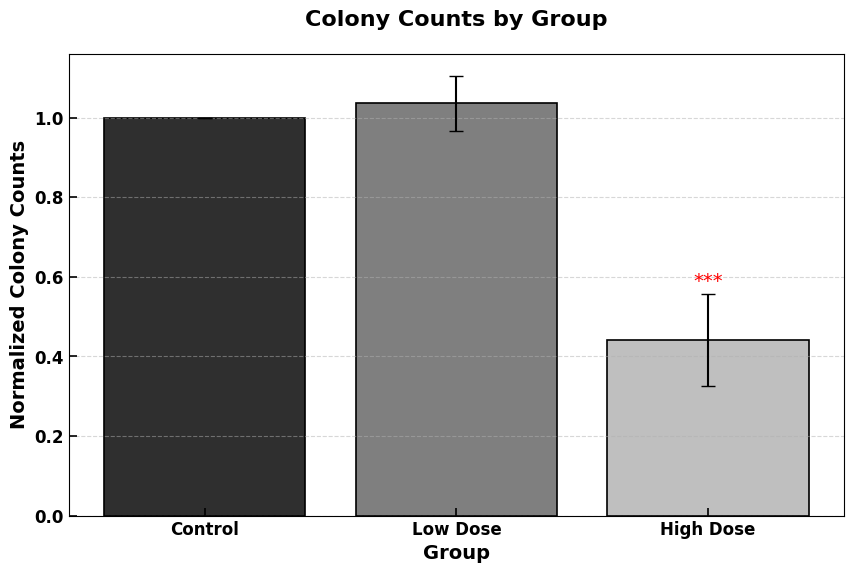

Total areas plot saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/Histogram_area.png


<Figure size 640x480 with 0 Axes>

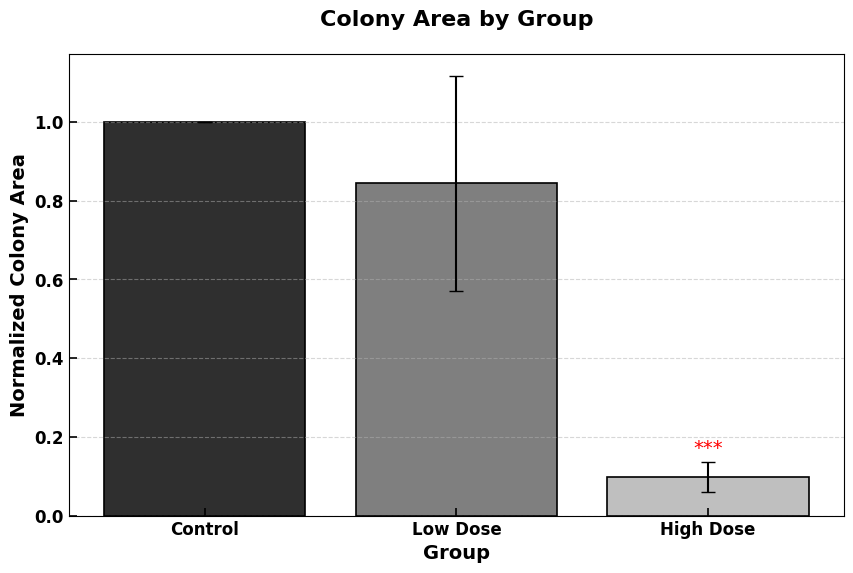

Normalized Average Area per Colony for set1_LowDose: [0.543538759764313, 0.6194447455514037]
Normalized Average Area per Colony for set1_HighDose: [0.25877736259096257, 0.16458523722980664]
Normalized Average Area per Colony for set2_LowDose: [0.8044486360756059, 1.304236450798375]
Normalized Average Area per Colony for set2_HighDose: [0.28195449842138787, 0.17906183711471946]

Average Area per Colony T-test Results:
Combined P-value for High Dose: 0.00011311795383423868
Combined P-value for Low Dose: 0.3653376290594298
Significant difference in average area per colony between the combined high dose and control groups.
No significant difference in average area per colony between the combined low dose and control groups.
Average area per colony plot saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/Histogram_avg_area.png


<Figure size 640x480 with 0 Axes>

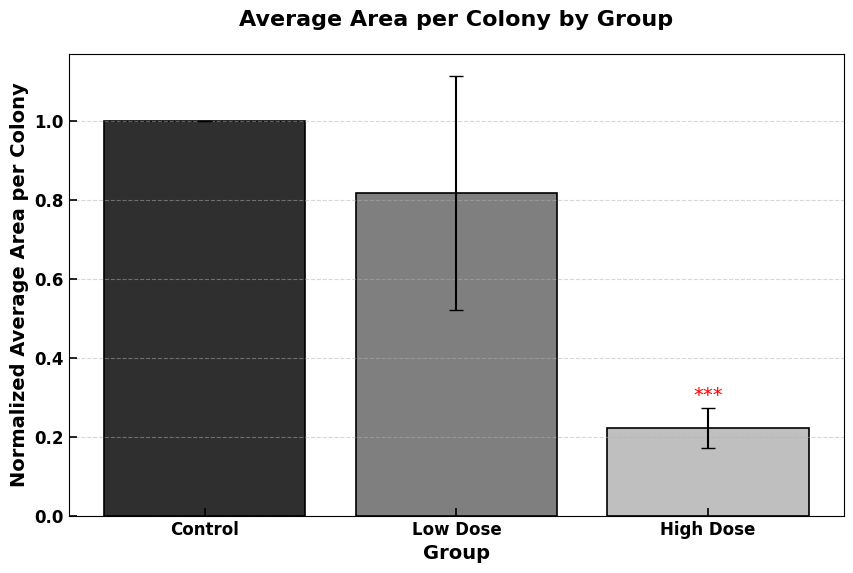

Colony counts data saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/colony_counts_analysis.csv
Total areas data saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/total_areas_analysis.csv
Average area per colony data saved to /content/drive/My Drive/Programing/Colony/GVB236/Colonias/avg_area_per_colony_analysis.csv

Analysis complete. All results saved to your Google Drive.


<Figure size 640x480 with 0 Axes>

In [ ]:
from scipy.stats import ttest_1samp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import csv

# Ensure the base path exists
if not os.path.exists(base_path):
    print(f"Error: The base path {base_path} does not exist.")
else:
    print(f"Base path set to {base_path}")

# Define image groups
image_groups = {

    'set1_control': ['C_1_1.png', 'C_2_1.png'],
    'set1_LowDose': ['LD_1_1.png', 'LD_2_1.png'],
    'set1_HighDose': ['HD_1_1.png', 'HD_2_1.png'],
    'set2_control': ['C_1_2.png', 'C_2_2.png'],
    'set2_LowDose': ['LD_1_2.png', 'LD_2_2.png'],
    'set2_HighDose': ['HD_1_2.png', 'HD_2_2.png']

}

# Function to apply a circular mask to the image
def apply_circular_mask(image):
    # Assuming image is grayscale
    rows, cols = image.shape
    center = (cols // 2, rows // 2)
    radius = min(center[0], center[1], cols - center[0], rows - center[1]) - 40  # Adjust as needed

    # Create the mask
    mask = np.zeros((rows, cols), dtype=np.uint8)
    cv2.circle(mask, center, radius, 255, -1)

    # Apply the mask
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    return masked_image

# Function to perform one-sample t-test
def perform_ttest(group, control_value=1):
    t_stat, p_value = ttest_1samp(group, control_value)
    return p_value

# Function to calculate mean and standard deviation
def calculate_stats(data_list):
    return np.mean(data_list), np.std(data_list)

# Function to determine p-value significance
def get_p_value_stars(p_value):
    if p_value is None:
        return '', 'black'
    elif p_value < 0.005:
        return '***', 'red'
    elif p_value < 0.01:
        return '**', 'green'
    elif p_value < 0.05:
        return '*', 'blue'
    return '', 'black'

# Initialize dictionaries to store results
colony_counts = {group: [] for group in image_groups}
total_areas = {group: [] for group in image_groups}

# Process images for colony counting and area calculation
for group in image_groups:
    for filename in image_groups[group]:
        filepath = os.path.join(base_path, filename)
        image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Error: Could not read image {filepath}")
            continue  # Skip this image if not found

        # Apply circular mask
        masked_image = apply_circular_mask(image)

        # Preprocess the image
        blurred = cv2.GaussianBlur(masked_image, (5, 5), 0)
        _, otsu_thresh = cv2.threshold(
            blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        inverted_thresh = cv2.bitwise_not(otsu_thresh)
        inverted_thresh_masked = cv2.bitwise_and(
            inverted_thresh, inverted_thresh,
            mask=apply_circular_mask(np.ones_like(image) * 255)
        )

        # Find contours (colonies) in the inverted image
        contours, _ = cv2.findContours(
            inverted_thresh_masked, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
        )

        # Filter contours based on circularity for colony counting
        circular_contours = []
        for contour in contours:
            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)
            if perimeter == 0:
                continue  # Avoid division by zero
            circularity = 4 * np.pi * area / (perimeter ** 2)
            if 0.2 < circularity <= 2:  # Adjust this range as needed
                circular_contours.append(contour)

        # Count the colonies
        colony_count = len(circular_contours)
        colony_counts[group].append(colony_count)

        # Calculate total area
        total_area = sum(cv2.contourArea(contour) for contour in contours)
        total_areas[group].append(total_area)

        # Visualization (optional)
        # Uncomment the following code to save the analysis images


        result_image_inverted = cv2.cvtColor(inverted_thresh_masked, cv2.COLOR_GRAY2BGR)  # Convert to BGR for coloring
        cv2.drawContours(result_image_inverted, circular_contours, -1, (0, 0, 255), 1)  # Red color for visibility

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(blurred, cmap='gray')
        plt.title('Blurred Image - ' + filename)

        plt.subplot(1, 2, 2)
        plt.imshow(result_image_inverted)
        plt.title(f'Inverted Image with Counted Colonies - {filename}\nColony Count: {colony_count}')

        # Save each plot to a file in Google Drive
        plot_filename = os.path.join(base_path, filename.replace('.png', '_analysis.png'))
        plt.savefig(plot_filename)
        plt.close()


        # Print raw colony count and area for each image
        print(f"Processed {filename} in {group}: Colony Count = {colony_count}, Total Area = {total_area}")

# Calculate average control counts and areas per set
average_control_counts = {}
average_control_areas = {}
for set_name in ['set1_control', 'set2_control']:
    control_counts = colony_counts[set_name]
    control_areas = total_areas[set_name]
    average_control_counts[set_name] = np.mean(control_counts)
    average_control_areas[set_name] = np.mean(control_areas)

# Normalize colony counts and areas using the average control values of each set
normalized_colony_counts = {}
normalized_areas = {}
for group in image_groups:
    if 'control' in group:
        continue  # Skip control groups for normalization
    set_control_name = 'set1_control' if 'set1' in group else 'set2_control'

    # Normalize colony counts
    normalized_counts = [
        count / average_control_counts[set_control_name]
        for count in colony_counts[group]
    ]
    normalized_colony_counts[group] = normalized_counts

    # Normalize areas
    normalized_area_values = [
        area / average_control_areas[set_control_name]
        for area in total_areas[group]
    ]
    normalized_areas[group] = normalized_area_values

    print(f"Normalized Colony Counts for {group}: {normalized_counts}")
    print(f"Normalized Areas for {group}: {normalized_area_values}")

# Perform T-tests for colony counts
# Combine high dose and low dose data from both sets
combined_high_dose_counts = normalized_colony_counts['set1_HighDose'] + normalized_colony_counts['set2_HighDose']
combined_low_dose_counts = normalized_colony_counts['set1_LowDose'] + normalized_colony_counts['set2_LowDose']

# Perform T-tests for combined groups
combined_p_values_counts = {
    'Combined_HighDose': perform_ttest(combined_high_dose_counts),
    'Combined_LowDose': perform_ttest(combined_low_dose_counts)
}

# Print combined p-values for colony counts
print("\nColony Counts T-test Results:")
print("Combined P-value for High Dose:", combined_p_values_counts['Combined_HighDose'])
print("Combined P-value for Low Dose:", combined_p_values_counts['Combined_LowDose'])

# Interpret the results for colony counts
alpha = 0.05
if combined_p_values_counts['Combined_HighDose'] < alpha:
    print("Significant difference in colony counts between the combined high dose and control groups.")
else:
    print("No significant difference in colony counts between the combined high dose and control groups.")

if combined_p_values_counts['Combined_LowDose'] < alpha:
    print("Significant difference in colony counts between the combined low dose and control groups.")
else:
    print("No significant difference in colony counts between the combined low dose and control groups.")

# Perform T-tests for total areas
combined_high_dose_areas = normalized_areas['set1_HighDose'] + normalized_areas['set2_HighDose']
combined_low_dose_areas = normalized_areas['set1_LowDose'] + normalized_areas['set2_LowDose']

# Perform T-tests for combined groups
combined_p_values_areas = {
    'Combined_HighDose': perform_ttest(combined_high_dose_areas),
    'Combined_LowDose': perform_ttest(combined_low_dose_areas)
}

# Print combined p-values for areas
print("\nTotal Areas T-test Results:")
print("Combined P-value for High Dose:", combined_p_values_areas['Combined_HighDose'])
print("Combined P-value for Low Dose:", combined_p_values_areas['Combined_LowDose'])

# Interpret the results for areas
if combined_p_values_areas['Combined_HighDose'] < alpha:
    print("Significant difference in total areas between the combined high dose and control groups.")
else:
    print("No significant difference in total areas between the combined high dose and control groups.")

if combined_p_values_areas['Combined_LowDose'] < alpha:
    print("Significant difference in total areas between the combined low dose and control groups.")
else:
    print("No significant difference in total areas between the combined low dose and control groups.")

# Prepare data for plotting colony counts
group_labels = ['Control', 'Low Dose', 'High Dose']
control_mean_counts = 1  # Normalized control mean
control_std_counts = 0

low_dose_counts = combined_low_dose_counts
high_dose_counts = combined_high_dose_counts

means_counts = [control_mean_counts, np.mean(low_dose_counts), np.mean(high_dose_counts)]
stds_counts = [control_std_counts, np.std(low_dose_counts), np.std(high_dose_counts)]
p_values_counts = [None, combined_p_values_counts['Combined_LowDose'], combined_p_values_counts['Combined_HighDose']]

# Plotting colony counts
plt.figure(figsize=(10, 6))
colors = ['#2f2f2f', '#7f7f7f', '#bfbfbf']  # Monochromatic gradient
bars = plt.bar(group_labels, means_counts, yerr=stds_counts, capsize=5, color=colors, edgecolor='black', linewidth=1.2)
for i, bar in enumerate(bars):
    if i == 0:
        continue  # Skip control bar for significance stars
    stars, color = get_p_value_stars(p_values_counts[i])
    y_pos = bar.get_height() + stds_counts[i] + 0.02
    plt.text(bar.get_x() + bar.get_width() / 2, y_pos, stars, ha='center', color=color, fontsize=14)

plt.xlabel('Group', fontsize=14, weight='bold')
plt.ylabel('Normalized Colony Counts', fontsize=14, weight='bold')
plt.title('Colony Counts by Group', fontsize=16, weight='bold', pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.gca().tick_params(axis='both', which='both', direction='in', length=6,
                      width=1.2, colors='black', grid_alpha=0.5)

# Save the plot to Google Drive
histogram_filename = os.path.join(base_path, 'Histogram_count.png')
plt.savefig(histogram_filename, dpi=300, bbox_inches='tight')
print(f"Colony counts plot saved to {histogram_filename}")

# Display the plot
plt.show()
plt.clf()

# Prepare data for plotting total areas
control_mean_areas = 1  # Normalized control mean
control_std_areas = 0

low_dose_areas = combined_low_dose_areas
high_dose_areas = combined_high_dose_areas

means_areas = [control_mean_areas, np.mean(low_dose_areas), np.mean(high_dose_areas)]
stds_areas = [control_std_areas, np.std(low_dose_areas), np.std(high_dose_areas)]
p_values_areas = [None, combined_p_values_areas['Combined_LowDose'], combined_p_values_areas['Combined_HighDose']]

# Plotting total areas
plt.figure(figsize=(10, 6))
bars = plt.bar(group_labels, means_areas, yerr=stds_areas, capsize=5, color=colors, edgecolor='black', linewidth=1.2)
for i, bar in enumerate(bars):
    if i == 0:
        continue  # Skip control bar for significance stars
    stars, color = get_p_value_stars(p_values_areas[i])
    y_pos = bar.get_height() + stds_areas[i] + 0.02
    plt.text(bar.get_x() + bar.get_width() / 2, y_pos, stars, ha='center', color=color, fontsize=14)

plt.xlabel('Group', fontsize=14, weight='bold')
plt.ylabel('Normalized Colony Area', fontsize=14, weight='bold')
plt.title('Colony Area by Group', fontsize=16, weight='bold', pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.gca().tick_params(axis='both', which='both', direction='in', length=6,
                      width=1.2, colors='black', grid_alpha=0.5)

# Save the plot to Google Drive
histogram_filename = os.path.join(base_path, 'Histogram_area.png')
plt.savefig(histogram_filename, dpi=300, bbox_inches='tight')
print(f"Total areas plot saved to {histogram_filename}")

# Display the plot
plt.show()
plt.clf()

# Calculate average area per colony for each image
avg_area_per_colony = {
    group: [
        total_area / count if count > 0 else 0
        for total_area, count in zip(total_areas[group], colony_counts[group])
    ]
    for group in image_groups
}

# Calculate average control average area per colony
average_control_per_colony = {}
for set_name in ['set1_control', 'set2_control']:
    control_avg_areas = avg_area_per_colony[set_name]
    average_control_per_colony[set_name] = np.mean(control_avg_areas)

# Normalize the average area per colony
normalized_avg_area_per_colony = {}
for group in image_groups:
    if 'control' in group:
        continue  # Skip control groups for normalization
    set_control_name = 'set1_control' if 'set1' in group else 'set2_control'
    normalized_values = [
        area / average_control_per_colony[set_control_name]
        for area in avg_area_per_colony[group]
    ]
    normalized_avg_area_per_colony[group] = normalized_values
    print(f"Normalized Average Area per Colony for {group}: {normalized_values}")

# Combine data for average area per colony
combined_high_dose_avg_area = normalized_avg_area_per_colony['set1_HighDose'] + normalized_avg_area_per_colony['set2_HighDose']
combined_low_dose_avg_area = normalized_avg_area_per_colony['set1_LowDose'] + normalized_avg_area_per_colony['set2_LowDose']

# Perform T-tests for average area per colony
combined_p_values_avg_area = {
    'Combined_HighDose': perform_ttest(combined_high_dose_avg_area),
    'Combined_LowDose': perform_ttest(combined_low_dose_avg_area)
}

# Print combined p-values for average area per colony
print("\nAverage Area per Colony T-test Results:")
print("Combined P-value for High Dose:", combined_p_values_avg_area['Combined_HighDose'])
print("Combined P-value for Low Dose:", combined_p_values_avg_area['Combined_LowDose'])

# Interpret the results for average area per colony
if combined_p_values_avg_area['Combined_HighDose'] < alpha:
    print("Significant difference in average area per colony between the combined high dose and control groups.")
else:
    print("No significant difference in average area per colony between the combined high dose and control groups.")

if combined_p_values_avg_area['Combined_LowDose'] < alpha:
    print("Significant difference in average area per colony between the combined low dose and control groups.")
else:
    print("No significant difference in average area per colony between the combined low dose and control groups.")

# Prepare data for plotting average area per colony
control_mean_avg_area = 1  # Normalized control mean
control_std_avg_area = 0

low_dose_avg_area = combined_low_dose_avg_area
high_dose_avg_area = combined_high_dose_avg_area

means_avg_area = [control_mean_avg_area, np.mean(low_dose_avg_area), np.mean(high_dose_avg_area)]
stds_avg_area = [control_std_avg_area, np.std(low_dose_avg_area), np.std(high_dose_avg_area)]
p_values_avg_area = [None, combined_p_values_avg_area['Combined_LowDose'], combined_p_values_avg_area['Combined_HighDose']]

# Plotting average area per colony
plt.figure(figsize=(10, 6))
bars = plt.bar(group_labels, means_avg_area, yerr=stds_avg_area, capsize=5, color=colors, edgecolor='black', linewidth=1.2)
for i, bar in enumerate(bars):
    if i == 0:
        continue  # Skip control bar for significance stars
    stars, color = get_p_value_stars(p_values_avg_area[i])
    y_pos = bar.get_height() + stds_avg_area[i] + 0.02
    plt.text(bar.get_x() + bar.get_width() / 2, y_pos, stars, ha='center', color=color, fontsize=14)

plt.xlabel('Group', fontsize=14, weight='bold')
plt.ylabel('Normalized Average Area per Colony', fontsize=14, weight='bold')
plt.title('Average Area per Colony by Group', fontsize=16, weight='bold', pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.gca().tick_params(axis='both', which='both', direction='in', length=6,
                      width=1.2, colors='black', grid_alpha=0.5)

# Save the plot to Google Drive
histogram_filename = os.path.join(base_path, 'Histogram_avg_area.png')
plt.savefig(histogram_filename, dpi=300, bbox_inches='tight')
print(f"Average area per colony plot saved to {histogram_filename}")

# Display the plot
plt.show()
plt.clf()

# Save colony counts data to CSV
data_records_counts = []
for group in image_groups:
    for i, filename in enumerate(image_groups[group]):
        raw_count = colony_counts[group][i]
        if 'control' in group:
            normalized_count = 1  # Control normalized to 1
            p_value = None
        else:
            normalized_count = normalized_colony_counts[group][i]
            combined_group = 'Combined_' + group.split('_')[1]
            p_value = combined_p_values_counts.get(combined_group, None)
        data_records_counts.append({
            'Group': group,
            'Image': filename,
            'Raw Colony Count': raw_count,
            'Normalized Colony Count': normalized_count,
            'P-Value': p_value
        })

# Convert the list to a pandas DataFrame
df_counts = pd.DataFrame(data_records_counts)

# Save the DataFrame to a CSV file in Google Drive
csv_filename_counts = os.path.join(base_path, 'colony_counts_analysis.csv')
df_counts.to_csv(csv_filename_counts, index=False)
print(f"Colony counts data saved to {csv_filename_counts}")

# Save total areas data to CSV
data_records_areas = []
for group in image_groups:
    for i, filename in enumerate(image_groups[group]):
        raw_area = total_areas[group][i]
        if 'control' in group:
            normalized_area = 1  # Control normalized to 1
            p_value = None
        else:
            normalized_area = normalized_areas[group][i]
            combined_group = 'Combined_' + group.split('_')[1]
            p_value = combined_p_values_areas.get(combined_group, None)
        data_records_areas.append({
            'Group': group,
            'Image': filename,
            'Raw Total Area': raw_area,
            'Normalized Total Area': normalized_area,
            'P-Value': p_value
        })

# Convert the list to a pandas DataFrame
# Convert the list to a pandas DataFrame
df_areas = pd.DataFrame(data_records_areas)

# Save the DataFrame to a CSV file in Google Drive
csv_filename_areas = os.path.join(base_path, 'total_areas_analysis.csv')
df_areas.to_csv(csv_filename_areas, index=False)
print(f"Total areas data saved to {csv_filename_areas}")

# Save average area per colony data to CSV
data_records_avg_area = []
for group in image_groups:
    for i, filename in enumerate(image_groups[group]):
        avg_area = avg_area_per_colony[group][i]
        if 'control' in group:
            normalized_avg_area = 1  # Control normalized to 1
            p_value = None
        else:
            normalized_avg_area = normalized_avg_area_per_colony[group][i]
            combined_group = 'Combined_' + group.split('_')[1]
            p_value = combined_p_values_avg_area.get(combined_group, None)
        data_records_avg_area.append({
            'Group': group,
            'Image': filename,
            'Raw Average Area per Colony': avg_area,
            'Normalized Average Area per Colony': normalized_avg_area,
            'P-Value': p_value
        })

# Convert the list to a pandas DataFrame
df_avg_area = pd.DataFrame(data_records_avg_area)

# Save the DataFrame to a CSV file in Google Drive
csv_filename_avg_area = os.path.join(base_path, 'avg_area_per_colony_analysis.csv')
df_avg_area.to_csv(csv_filename_avg_area, index=False)
print(f"Average area per colony data saved to {csv_filename_avg_area}")

print("\nAnalysis complete. All results saved to your Google Drive.")